In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import glob
import geopandas as gp
plt.rcParams['figure.figsize'] = (12,9)
plt.rcParams['figure.facecolor']='w'
plt.rcParams['font.family'] = "serif"
import warnings
warnings.filterwarnings('ignore')

In [2]:
eb = gp.read_file('USA_CEJST/usa.shp')

In [3]:
eb.head()

,GEOID10,SF,CF,DF_PFS,AF_PFS,HDF_PFS,DSF_PFS,EBF_PFS,EALR_PFS,EBLR_PFS,...,M_HSG_EOMI,M_PLN_EOMI,M_WTR_EOMI,M_HLTH_EOM,M_WKFC_EOM,M_WKFC_EBS,M_EBSI,UI_EXP,THRHLD,geometry
0,27139080202,Minnesota,Scott County,0.04,0.07,0.03,0.44,0.00,0.38,0.78,...,0,0,0,0,0,0,0,Nation,21,"POLYGON ((-93.39902 44.74655, -93.39902 44.747..."
1,27139080204,Minnesota,Scott County,0.04,0.16,0.06,0.38,0.01,0.36,0.78,...,0,0,0,0,0,0,0,Nation,21,"POLYGON ((-93.38203 44.73933, -93.38158 44.739..."
2,27139080100,Minnesota,Scott County,0.44,0.35,0.57,0.49,0.06,0.47,0.84,...,0,0,0,0,0,1,0,Nation,21,"POLYGON ((-93.34248 44.78788, -93.34183 44.787..."
3,27139080302,Minnesota,Scott County,0.02,0.14,0.03,0.38,0.02,0.57,0.78,...,0,0,0,0,0,0,0,Nation,21,"POLYGON ((-93.52073 44.72061, -93.52073 44.721..."
4,27139080400,Minnesota,Scott County,0.33,0.52,0.39,0.40,0.08,0.38,0.80,...,0,0,0,0,0,1,0,Nation,21,"POLYGON ((-93.51900 44.80250, -93.51732 44.803..."


In [4]:
mask = (eb['CF']=='Cook County') & (eb['SF']=='Illinois')
eb[mask]

,GEOID10,SF,CF,DF_PFS,AF_PFS,HDF_PFS,DSF_PFS,EBF_PFS,EALR_PFS,EBLR_PFS,...,M_HSG_EOMI,M_PLN_EOMI,M_WTR_EOMI,M_HLTH_EOM,M_WKFC_EOM,M_WKFC_EBS,M_EBSI,UI_EXP,THRHLD,geometry
17215,17031840300,Illinois,Cook County,0.59,0.14,0.23,0.95,0.54,0.00,0.31,...,1,1,1,0,1,1,0,Nation,21,"POLYGON ((-87.68608 41.82296, -87.68607 41.823..."
17216,17031840200,Illinois,Cook County,0.57,0.02,0.23,0.99,0.44,0.00,0.31,...,0,1,1,0,1,1,0,Nation,21,"POLYGON ((-87.64633 41.84009, -87.64632 41.839..."
17217,17031841100,Illinois,Cook County,0.94,0.02,0.74,0.99,0.56,0.00,0.42,...,0,1,1,1,1,1,1,Nation,21,"POLYGON ((-87.62935 41.85280, -87.62934 41.852..."
17218,17031841200,Illinois,Cook County,0.41,0.16,0.10,0.96,0.52,0.00,0.31,...,1,1,1,0,1,1,1,Nation,21,"POLYGON ((-87.68814 41.85569, -87.68816 41.856..."
17219,17031838200,Illinois,Cook County,0.01,0.22,0.00,0.97,0.30,0.00,0.31,...,0,1,1,0,0,0,0,Nation,21,"POLYGON ((-87.66782 41.87418, -87.66768 41.874..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18610,17031823604,Illinois,Cook County,0.29,0.16,0.51,0.77,0.18,0.12,0.52,...,0,0,1,0,0,0,0,Nation,21,"POLYGON ((-87.78982 41.64633, -87.79053 41.646..."
18611,17031825501,Illinois,Cook County,0.87,0.80,0.60,0.87,0.61,0.63,0.64,...,0,0,0,1,0,0,0,Nation,21,"POLYGON ((-87.70200 41.57170, -87.70213 41.571..."
18612,17031825302,Illinois,Cook County,0.14,0.27,0.19,0.82,0.27,0.28,0.57,...,0,0,0,0,0,1,0,Nation,21,"POLYGON ((-87.75997 41.58827, -87.75980 41.588..."
18613,17031823602,Illinois,Cook County,0.39,0.24,0.62,0.82,0.27,0.14,0.43,...,0,0,1,0,0,0,0,Nation,21,"POLYGON ((-87.77216 41.64660, -87.77227 41.646..."


In [5]:
eb.rename(columns={'GEOID10':'geoid10'}, inplace=True)

In [6]:
eb.geoid10 = eb.geoid10.apply(np.int64)

In [7]:
chicago = gp.read_file('processed_data/chicago_data_v02.shp')
chicago

,geoid10,commarea,commarea_n,H_a,H_amin,TOTAL POPU,crime_coun,is_violent,tract_area,pct_park,...,kw_total,existing_i,COMMUNITY,PERCENT OF,PERCENT HO,PERCENT AG,PER CAPITA,HARDSHIP I,PERCENT_CA,geometry
0,17031842400,44,44.0,0.691932,2.513031,3304,731,310,1.968638,0.028370,...,21308.75,2.0,Chatham,3.3,27.8,40.3,18881,60.0,0.207434,"POLYGON ((-87.62405 41.73022, -87.62405 41.730..."
1,17031440201,44,44.0,0.691932,2.513031,5060,673,318,0.531537,0.000000,...,NaN,0.0,Chatham,3.3,27.8,40.3,18881,60.0,0.257077,"POLYGON ((-87.61235 41.74568, -87.61234 41.745..."
2,17031440201,44,44.0,0.691932,2.513031,5060,673,318,0.531537,0.000000,...,7240.25,0.0,Chatham,3.3,27.8,40.3,18881,60.0,0.257077,"POLYGON ((-87.61235 41.74568, -87.61234 41.745..."
3,17031440202,44,44.0,0.691932,2.513031,2999,383,152,0.781699,0.033547,...,9407.75,5.0,Chatham,3.3,27.8,40.3,18881,60.0,0.371764,"POLYGON ((-87.60852 41.73660, -87.60875 41.736..."
4,17031440102,44,44.0,0.691932,2.513031,3127,547,241,0.627504,0.000000,...,8337.00,0.0,Chatham,3.3,27.8,40.3,18881,60.0,0.350394,"POLYGON ((-87.59956 41.74540, -87.59890 41.745..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,17031120200,12,12.0,-0.996737,0.824363,4430,66,17,2.392156,0.020754,...,13873.50,4.0,Forest Glen,1.1,7.5,40.5,44164,11.0,0.680456,"POLYGON ((-87.74884 41.98364, -87.74906 41.983..."
842,17031620300,62,62.0,0.580884,2.401983,6399,184,57,0.992183,0.050583,...,10158.25,3.0,West Elsdon,11.1,15.6,37.7,15754,69.0,0.219484,"POLYGON ((-87.72310 41.79094, -87.72309 41.790..."
843,17031620400,62,62.0,0.580884,2.401983,5198,120,55,0.656283,0.006880,...,8237.75,3.0,West Elsdon,11.1,15.6,37.7,15754,69.0,0.191066,"POLYGON ((-87.71312 41.78609, -87.71326 41.786..."
844,17031620100,62,62.0,0.580884,2.401983,4289,170,50,0.837580,0.000000,...,8694.75,1.0,West Elsdon,11.1,15.6,37.7,15754,69.0,0.195949,"POLYGON ((-87.71347 41.79565, -87.71347 41.795..."


In [8]:
chicago = chicago.merge(eb[['geoid10', 'EBF_PFS']], on='geoid10', how='left')
chicago

,geoid10,commarea,commarea_n,H_a,H_amin,TOTAL POPU,crime_coun,is_violent,tract_area,pct_park,...,existing_i,COMMUNITY,PERCENT OF,PERCENT HO,PERCENT AG,PER CAPITA,HARDSHIP I,PERCENT_CA,geometry,EBF_PFS
0,17031842400,44,44.0,0.691932,2.513031,3304,731,310,1.968638,0.028370,...,2.0,Chatham,3.3,27.8,40.3,18881,60.0,0.207434,"POLYGON ((-87.62405 41.73022, -87.62405 41.730...",0.88
1,17031440201,44,44.0,0.691932,2.513031,5060,673,318,0.531537,0.000000,...,0.0,Chatham,3.3,27.8,40.3,18881,60.0,0.257077,"POLYGON ((-87.61235 41.74568, -87.61234 41.745...",0.72
2,17031440201,44,44.0,0.691932,2.513031,5060,673,318,0.531537,0.000000,...,0.0,Chatham,3.3,27.8,40.3,18881,60.0,0.257077,"POLYGON ((-87.61235 41.74568, -87.61234 41.745...",0.72
3,17031440202,44,44.0,0.691932,2.513031,2999,383,152,0.781699,0.033547,...,5.0,Chatham,3.3,27.8,40.3,18881,60.0,0.371764,"POLYGON ((-87.60852 41.73660, -87.60875 41.736...",0.73
4,17031440102,44,44.0,0.691932,2.513031,3127,547,241,0.627504,0.000000,...,0.0,Chatham,3.3,27.8,40.3,18881,60.0,0.350394,"POLYGON ((-87.59956 41.74540, -87.59890 41.745...",0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,17031120200,12,12.0,-0.996737,0.824363,4430,66,17,2.392156,0.020754,...,4.0,Forest Glen,1.1,7.5,40.5,44164,11.0,0.680456,"POLYGON ((-87.74884 41.98364, -87.74906 41.983...",0.10
842,17031620300,62,62.0,0.580884,2.401983,6399,184,57,0.992183,0.050583,...,3.0,West Elsdon,11.1,15.6,37.7,15754,69.0,0.219484,"POLYGON ((-87.72310 41.79094, -87.72309 41.790...",0.56
843,17031620400,62,62.0,0.580884,2.401983,5198,120,55,0.656283,0.006880,...,3.0,West Elsdon,11.1,15.6,37.7,15754,69.0,0.191066,"POLYGON ((-87.71312 41.78609, -87.71326 41.786...",0.66
844,17031620100,62,62.0,0.580884,2.401983,4289,170,50,0.837580,0.000000,...,1.0,West Elsdon,11.1,15.6,37.7,15754,69.0,0.195949,"POLYGON ((-87.71347 41.79565, -87.71347 41.795...",0.52


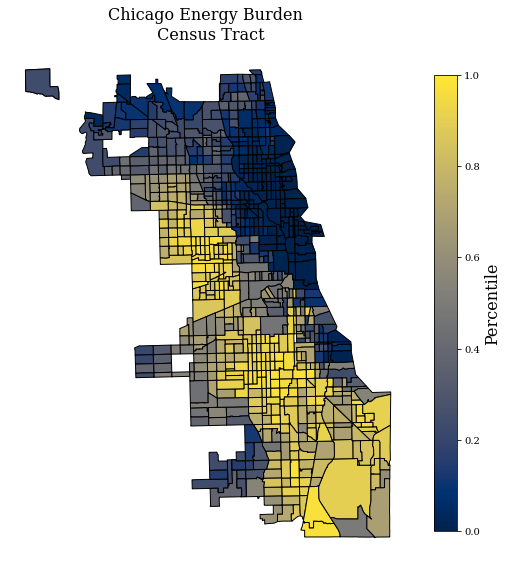

In [18]:
import matplotlib.colors as colors
fig, ax = plt.subplots(figsize=(9,12))
norm = colors.Normalize(vmin=0, vmax=1)
cmap = 'cividis'
cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
chicago.plot(ax=ax, edgecolor='k',column='EBF_PFS', norm=norm, cmap=cmap, legend=False)
ax_cbar = fig.colorbar(cbar, ax=ax, shrink=0.7)
ax_cbar.set_label(r'Percentile', fontsize=16)
# counties.centroid.plot(ax=ax, color='tab:red')
ax.set_title('Chicago Energy Burden \n Census Tract', fontsize=16)
ax.set_axis_off()
plt.savefig('../chicago-solar/paper/figures/energy_burden.eps', format='eps')

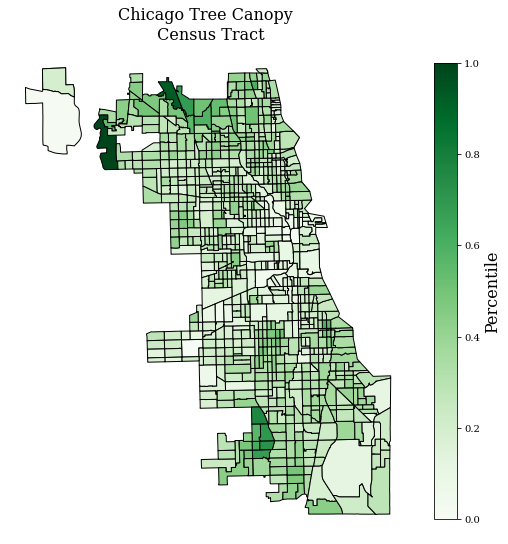

In [19]:
import matplotlib.colors as colors
fig, ax = plt.subplots(figsize=(9,12))
norm = colors.Normalize(vmin=0, vmax=1)
cmap = 'Greens'
cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
chicago.plot(ax=ax, edgecolor='k',column='PERCENT_CA', norm=norm, cmap=cmap, legend=False)
ax_cbar = fig.colorbar(cbar, ax=ax, shrink=0.7)
ax_cbar.set_label(r'Percentile', fontsize=16)
# counties.centroid.plot(ax=ax, color='tab:red')
ax.set_title('Chicago Tree Canopy \n Census Tract', fontsize=16)
ax.set_axis_off()
plt.savefig('../chicago-solar/paper/figures/tree_canopy.eps', format='eps')

<AxesSubplot:>

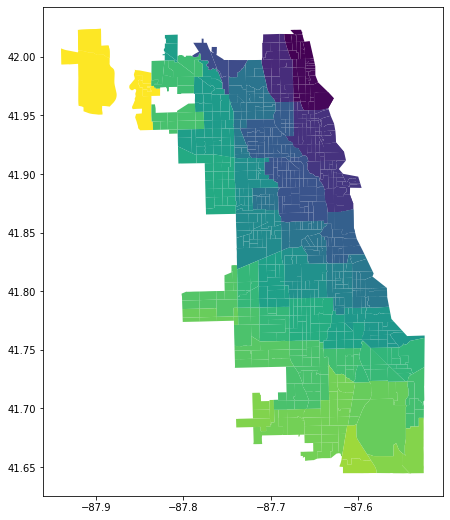

In [11]:
chicago.plot(column='H_amin')

In [12]:
chicago.to_file('processed_data/chicago_data_v03.shp')